### Changing K - Solution

In this notebook, you will get some practice with different values of **k**, and how it changes the clusters that are observed in the data.  As well as how to determine what the best value for **k** might be for a dataset.

To get started, let's read in our necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import helpers2 as h
import tests as t
from IPython import display

%matplotlib inline

# Make the images larger
plt.rcParams['figure.figsize'] = (16, 9)

`1.` To get started, there is a function called **simulate_data** within the **helpers2** module.  Read the documentation on the function by running the cell below.  Then use the function to simulate a dataset with 200 data points (rows), 5 features (columns), and 4 centers

In [2]:
h.simulate_data


<function helpers2.simulate_data(n=500, features=10, centroids=3)>

In [3]:
data = h.simulate_data(200, 5, 4)



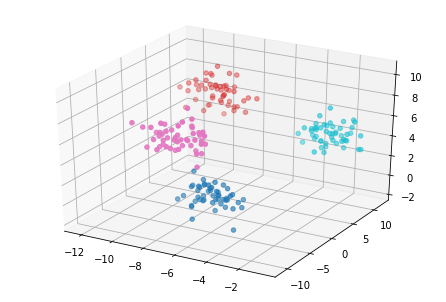

In [4]:
# Try instantiating a model with 4 centers
kmeans_4 = KMeans(n_clusters=4)

# Then fit the model to your data using the fit method
model_4 = kmeans_4.fit(data)

# Finally predict the labels on the same data to show the category that point belongs to
labels_4 = model_4.predict(data)

# If you did all of that correctly, this should provide a plot of your data colored by center
h.plot_data(data, labels_4)

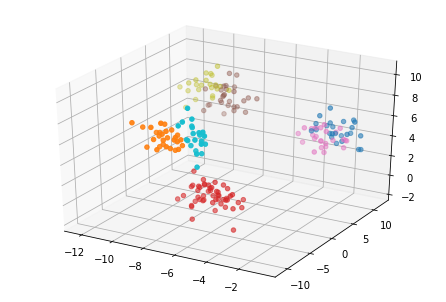

In [5]:
# Try instantiating a model with 7 centers
kmeans_7 = KMeans(n_clusters=7)

# Then fit the model to your data using the fit method
model_7 = kmeans_7.fit(data)

# Finally predict the labels on the same data to show the category that point belongs to
labels_7 = model_7.predict(data)

# If you did all of that correctly, this should provide a plot of your data colored by center
h.plot_data(data, labels_7)

Visually, we get some indication of how well our model is doing, but it isn't totally apparent. Each time additional centers are considered, the distances between the points and the center will decrease.  However, at some point, that decrease is not substantial enough to suggest the need for an additional cluster.  

Using a scree plot is a common method for understanding if an additional cluster center is needed.  The elbow method used by looking at a scree plot is still pretty subjective, but let's take a look to see how many cluster centers might be indicated.
_________

`6.` Once you have **fit** a kmeans model to some data in sklearn, there is a **score** method, which takes the data.  This score is an indication of how far the points are from the centroids.  By fitting models for centroids from 1-10, and keeping track of the score and the number of centroids, you should be able to build a scree plot.  

This plot should have the number of centroids on the x-axis, and the absolute value of the score result on the y-axis.  You can see the plot I retrieved by running the solution code.  Try creating your own scree plot, as you will need it for the final questions.

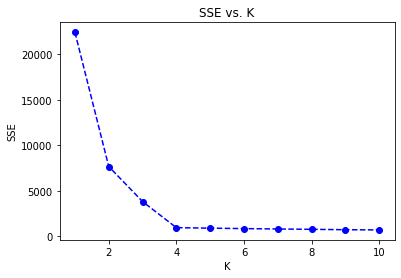

In [6]:
def kmeans_score (data, center): 
    kmeans = KMeans(n_clusters = center) # instantiating a model
    model = kmeans.fit(data) # Then fit the model to your data using the fit method
    labels = model.predict (data)  #predict the labels on the same data to show the category that point belongs to
    score = np.abs(model.score(data))
    
    return score    

scores = []
centers = list(range(1,11))
for center in centers:
    scores.append(kmeans_score(data,center))


plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');